In [1]:
import sys

import utils
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# define default style of matplotlib
plt.style.use('seaborn-v0_8-whitegrid')


### 1.1

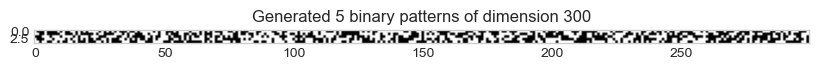

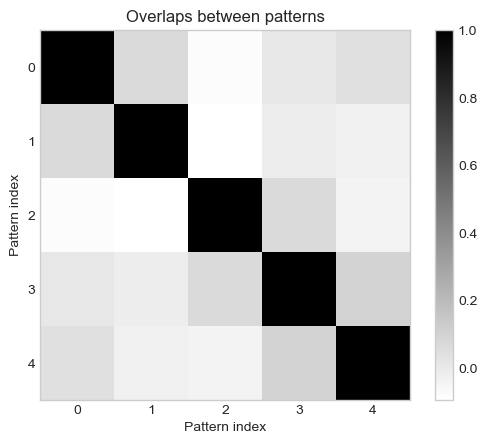

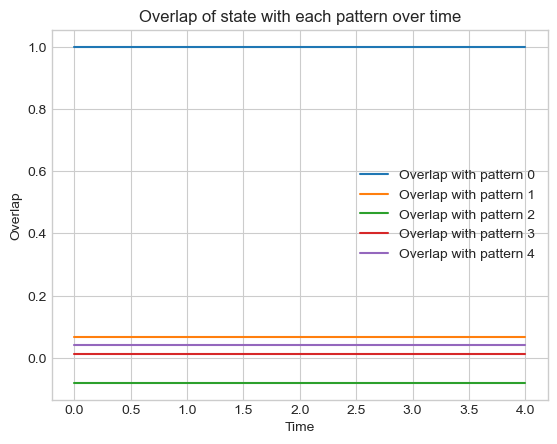

In [3]:
NETWORK_DIM = 300
N_PATTERNS = 5
T = 5
patterns = utils.get_n_binary_patterns(n_patterns=N_PATTERNS, pattern_dim=NETWORK_DIM, plot_patterns_overlaps=True, plot_patterns=True)
cs = patterns[0]#np.random.binomial(1, 0.5, NETWORK_DIM) * 2 - 1
overlaps = []
for t in range(T):
    overlaps_t = [utils.overlap(cs, p) for p in patterns]
    overlaps.append(overlaps_t)
    ns = utils.compute_next_state_with_overlaps(cs, patterns)
    cs = ns
overlaps = np.array(overlaps).T
plt.figure()
for i, overlap in enumerate(overlaps):
    plt.plot(overlap, label=f'Overlap with pattern {i}')

plt.xlabel('Time')
plt.ylabel('Overlap')
plt.title('Overlap of state with each pattern over time')
plt.legend()
plt.show()

The overlap remains constant because overlap between patterns is 0 and initial state is pattern 0 hence in the overlap updatte step, next state is equal to current state

### 1.2

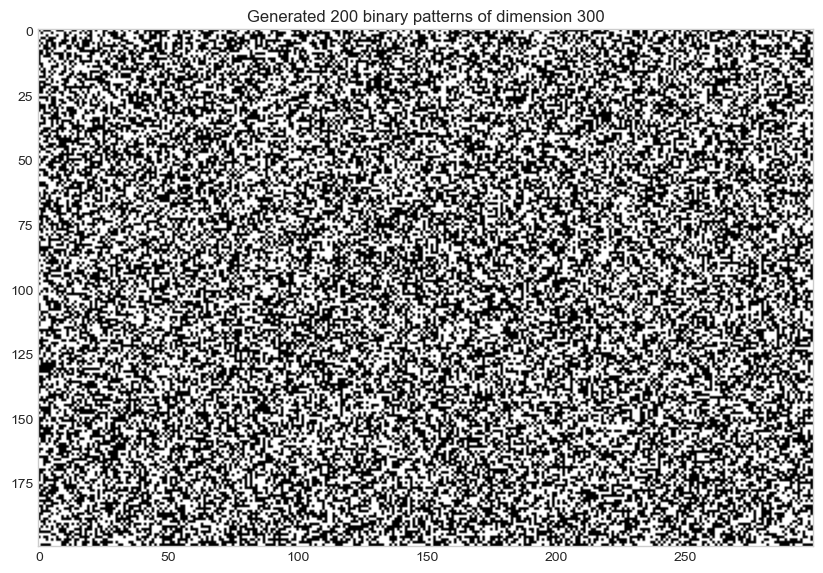

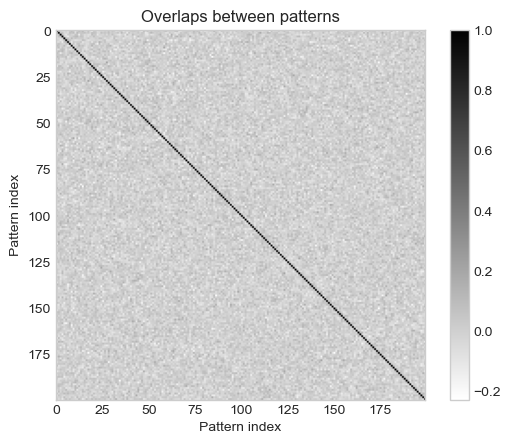

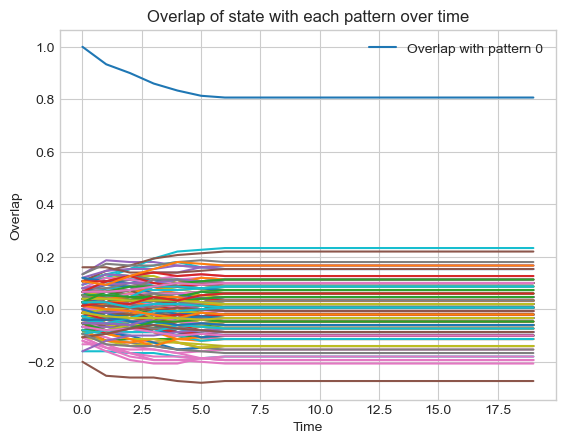

In [5]:
NETWORK_DIM = 300
N_PATTERNS = 200
T = 20
patterns = utils.get_n_binary_patterns(n_patterns=N_PATTERNS, pattern_dim=NETWORK_DIM, plot_patterns_overlaps=True, plot_patterns=True)
weights = utils.get_weights(patterns, self_connections=True)
cs = patterns[0]#np.random.binomial(1, 0.5, NETWORK_DIM) * 2 - 1
overlaps = []
for t in range(T):
    overlaps_t = [utils.overlap(cs, p) for p in patterns]
    overlaps.append(overlaps_t)
    ns = utils.compute_next_state(cs, weights)
    cs = ns
overlaps = np.array(overlaps).T
plt.figure()
for i, overlap in enumerate(overlaps):
    plt.plot(overlap, label='' if i != 0 else 'Overlap with pattern 0')

plt.xlabel('Time')
plt.ylabel('Overlap')
plt.title('Overlap of state with each pattern over time')
plt.legend()
plt.show()

diverge from initial state but stay close (maybe like the plot in the energy landscape lecture)

### 1.3

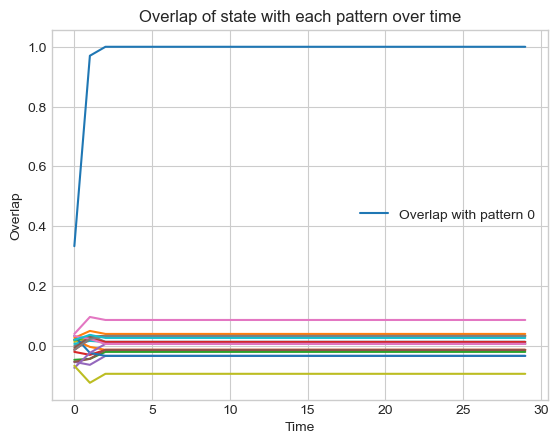

In [6]:
NETWORK_DIM = 600
N_PATTERNS = 20
T = 30
N_FLIP = 200

patterns = utils.get_n_binary_patterns(n_patterns=N_PATTERNS, pattern_dim=NETWORK_DIM)
cs = patterns[0].copy()#np.random.binomial(1, 0.5, NETWORK_DIM) * 2 - 1

#flip N_FLIP bits of cs
indices = np.random.choice(NETWORK_DIM, N_FLIP, replace=False)

cs[indices] = -cs[indices]


overlaps = []
for t in range(T):
    overlaps_t = [utils.overlap(cs, p) for p in patterns]
    overlaps.append(overlaps_t)
    ns = utils.compute_next_state_with_overlaps(cs, patterns)
    cs = ns
overlaps = np.array(overlaps).T
plt.figure()
for i, overlap in enumerate(overlaps):
    plt.plot(overlap, label='' if i != 0 else 'Overlap with pattern 0')

plt.xlabel('Time')
plt.ylabel('Overlap')
plt.title('Overlap of state with each pattern over time')
plt.legend()
plt.show()


### 1.4

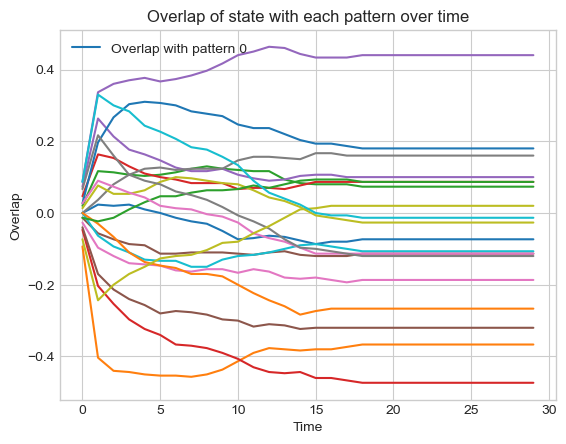

In [7]:
NETWORK_DIM = 600
N_PATTERNS = 20
T = 30
N_FLIP = 300

patterns = utils.get_n_binary_patterns(n_patterns=N_PATTERNS, pattern_dim=NETWORK_DIM)
cs = patterns[0].copy()#np.random.binomial(1, 0.5, NETWORK_DIM) * 2 - 1

#flip N_FLIP bits of cs
indices = np.random.choice(NETWORK_DIM, N_FLIP, replace=False)

cs[indices] = -cs[indices]


overlaps = []
for t in range(T):
    overlaps_t = [utils.overlap(cs, p) for p in patterns]
    overlaps.append(overlaps_t)
    ns = utils.compute_next_state_with_overlaps(cs, patterns)
    cs = ns
overlaps = np.array(overlaps).T
plt.figure()
for i, overlap in enumerate(overlaps):
    plt.plot(overlap, label='' if i != 0 else 'Overlap with pattern 0')

plt.xlabel('Time')
plt.ylabel('Overlap')
plt.title('Overlap of state with each pattern over time')
plt.legend()
plt.show()


### 1.5

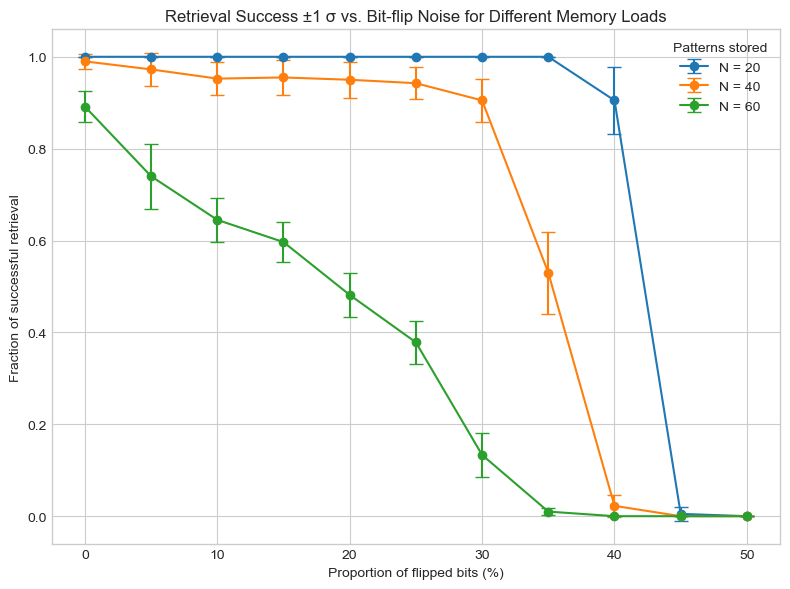

In [8]:
NETWORK_DIM   = 600
N_PATTERNS    = [20, 40, 60]
T             = 5
N_FLIPS       = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300]
N_TRIALS      = 10       # number of repetitions per setting
THRESHOLD     = 0    # for successful retrieval

plt.figure(figsize=(8,6))

for n_patterns in N_PATTERNS:
    # array to hold shape (n_trials, n_flips)
    all_fracs = np.zeros((N_TRIALS, len(N_FLIPS)))
    
    for trial in range(N_TRIALS):
        # draw a fresh set of patterns once per trial
        patterns = utils.get_n_binary_patterns(n_patterns=n_patterns,
                                               pattern_dim=NETWORK_DIM)
        
        fracs = []
        for n_flip in N_FLIPS:
            success = []
            for init in patterns:
                cs = init.copy()
                # flip bits
                idx = np.random.choice(NETWORK_DIM, n_flip, replace=False)
                cs[idx] = -cs[idx]
                
                # run dynamics
                for _ in range(T):
                    cs = utils.compute_next_state_with_overlaps(cs, patterns)
                
                # check overlap
                success.append(np.abs(utils.overlap(init, cs) - 1) <= THRESHOLD)
            
            fracs.append(np.mean(success))
        
        all_fracs[trial] = fracs
    
    # compute mean & std across trials
    mean_fracs = all_fracs.mean(axis=0)
    std_fracs  = all_fracs.std(axis=0)
    
    flip_proportion = (np.array(N_FLIPS) / NETWORK_DIM * 100).astype(int)
    plt.errorbar(flip_proportion, mean_fracs, yerr=std_fracs,
                 label=f'N = {n_patterns}', fmt='o-', capsize=5)

plt.xlabel('Proportion of flipped bits (%)')
plt.ylabel('Fraction of successful retrieval')
plt.title('Retrieval Success ±1 σ vs. Bit-flip Noise for Different Memory Loads')
# add legend for the fill colors
plt.legend(title="Patterns stored")
plt.tight_layout()
plt.show()


### 1.6

Threshold = 1:   0%|          | 0/10 [00:00<?, ?it/s]

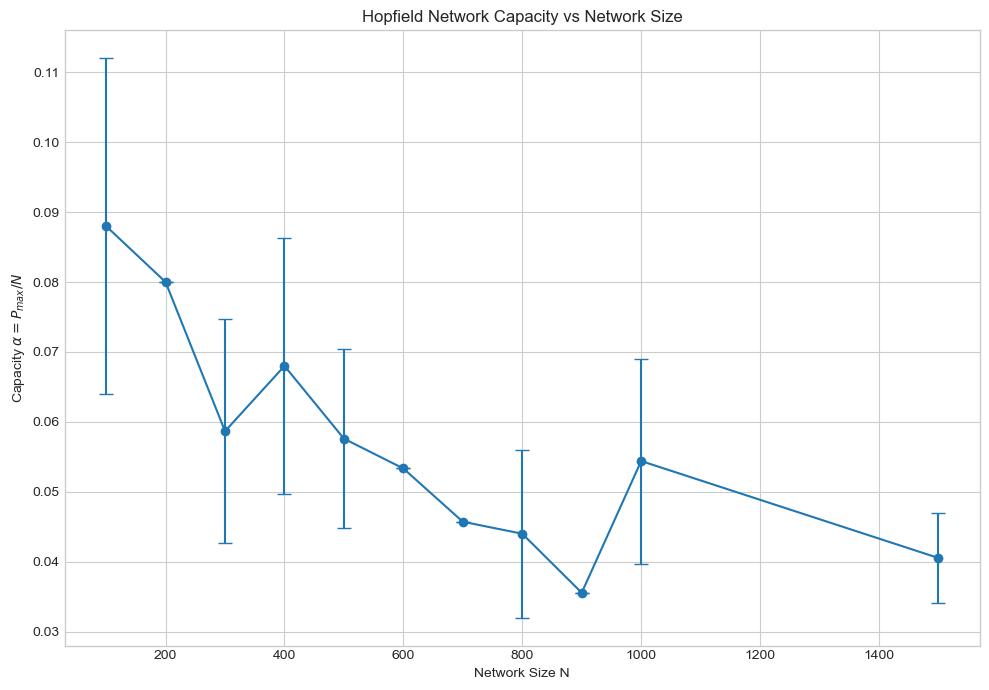

In [9]:
THRESHOLDS = [1]#[1e-2, 1e-3, 1e-5, 1e-6]
NETWORK_DIM = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500]
N_TRIALS = 10

plt.figure(figsize=(10, 7))

for THRESHOLD in THRESHOLDS:
    all_p_maxs = np.zeros((N_TRIALS, len(NETWORK_DIM)), dtype=int)

    for trial in tqdm(range(N_TRIALS), desc=f"Threshold = {THRESHOLD}"):
        for idx, dim in enumerate(NETWORK_DIM):
            P = 1
            while True:
                patterns = utils.get_n_binary_patterns(n_patterns=P, pattern_dim=dim)
                weights = utils.get_weights(patterns)
                success = True
                for p in patterns:
                    ns = utils.compute_next_state(p, weights)
                    if utils.overlap(p, ns) < THRESHOLD:
                        success = False
                        break
                if not success:
                    break
                P *= 2

            low = P // 2
            p_max = low
            for P_lin in range(low + 1, P):
                patterns = utils.get_n_binary_patterns(n_patterns=P_lin, pattern_dim=dim)
                weights = utils.get_weights(patterns)
                success = True
                for p in patterns:
                    ns = utils.compute_next_state(p, weights)
                    if utils.overlap(p, ns) <= THRESHOLD:
                        success = False
                        break
                if not success:
                    p_max = P_lin - 1
                    break
                else:
                    p_max = P_lin
                tqdm.write(f"\rTrial {trial+1}, N={dim}, Threshold={THRESHOLD}: curr P_max={p_max}", end='       ')
                sys.stdout.flush()
            all_p_maxs[trial, idx] = p_max
        # tqdm.write("\rDone", end='                                                                  ')
        # sys.stdout.flush()
    mean_p_maxs = all_p_maxs.mean(axis=0)
    stderr_p_maxs = all_p_maxs.std(axis=0)
    theoretical_alpha = mean_p_maxs / np.array(NETWORK_DIM)
    
    plt.errorbar(NETWORK_DIM, theoretical_alpha, yerr=stderr_p_maxs / np.array(NETWORK_DIM),
                 fmt='o-', capsize=5, label=f'Threshold = {THRESHOLD}')

plt.xlabel('Network Size N')
plt.ylabel(r'Capacity $\alpha = P_{max}/N$')
plt.title('Hopfield Network Capacity vs Network Size')
# plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
